# INF161, Prosjektinnlevering 1
# Kristin Loka Øydna

Under følger koder og forklaringer for prosjektinnlevering 1. Fikk ikke skrevet en egen rapport.

For å få enklere oversikt er filene film.csv, rangering.csv og bruker.csv slått sammen til ett data frame kalt merged_df. De er slått sammen med hensyn på FilmID og BrukerID. 200 brukere har rangert omtrent 500 filmer. Totalt inneholder datasettet 5791 anonyme rangeringer. 


Dette datasettet er brukt til å gi oversikt over statistiske målinger, og til å lage ulike visualiseringer. Senere splittes det opp i test-, validerings- og treningsdata. 

In [1]:
import numpy as np
import pandas as pd
import collections
import statistics as s
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from sklearn.dummy import DummyRegressor, DummyClassifier


film_data = pd.read_csv("film.csv")
print(film_data)
rangering_data = pd.read_csv("rangering.csv")
bruker_data = pd.read_csv("bruker.csv")

merged_df = pd.merge(rangering_data, film_data, on = "FilmID")
merged_df = pd.merge(merged_df, bruker_data, on = "BrukerID")

print("Gjennomsnittsalder:",np.mean(merged_df["Alder"]))
print("Median for alder:",np.median(merged_df["Alder"]))
print("Standardavvik for alder:",round(np.std(merged_df["Alder"], ddof = 1),2))

job = np.array(merged_df["Jobb"])
count_job = collections.Counter(job)
print("Antall brukere som har de forskjellige jobbene:",count_job)
print("Flest brukere har jobb nr.",s.mode(merged_df["Jobb"]))

gender = merged_df["Kjonn"]
print("Fordeling mellom mannlige og kvinnelige brukere:")
print(gender.value_counts())


     FilmID                                    Tittel  Action  Adventure  \
0         0                 Autumn in New York (2000)       0          0   
1         1  Vie est belle, La (Life is Rosey) (1987)       0          0   
2         2                    Defying Gravity (1997)       0          0   
3         3                    Ruthless People (1986)       0          0   
4         4                  Portraits Chinois (1996)       0          0   
..      ...                                       ...     ...        ...   
489     496                    Lethal Weapon 4 (1998)       1          0   
490     497                           Only You (1994)       0          0   
491     498         You Can't Take It With You (1938)       0          0   
492     499              Home for the Holidays (1995)       0          0   
493     500                       Magnum Force (1973)       0          0   

     Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  \
0            

In [16]:
rangering_data

,BrukerID,FilmID,Rangering,Tidstempel
0,0,88,3,959441640
1,0,365,3,959442446
2,0,150,5,959442486
3,0,161,3,959442624
4,0,323,4,959442669
...,...,...,...,...
5786,381,228,4,975871874
5787,381,129,5,975871920
5788,381,395,4,975872077
5789,381,83,4,975872136


Number of entries:

    Rangering: 5791 rows, 4 columns

    Bruker: 200 rows, 5 columns

    Film: 494 rows, 20 columns

    Merged: 5791 rows, 27 columns

    
Viktige statistiske målinger:

Gjennomsnittsalder for brukerne er 30,4 år. Medianen er 25 år. Dette er ikke overraskende da flest brukere er i aldersgruppen 25-34 år. Standardavviket er på 10,9 år, noe som tyder på stor spreding i alder. 

74% av brukerne er menn, og 26% er kvinner. Flest brukere er studenter.  

In [3]:
merged_df

,BrukerID,FilmID,Rangering,Tidstempel,Tittel,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Kjonn,Alder,Jobb,Postkode
0,0,88,3,959441640,Star Trek: Insurrection (1998),1,0,0,0,0,...,0,0,1,0,0,0,M,45,6,92103
1,0,365,3,959442446,Star Trek: The Wrath of Khan (1982),1,1,0,0,0,...,0,0,1,0,0,0,M,45,6,92103
2,0,150,5,959442486,Blade Runner (1982),0,0,0,0,0,...,0,0,1,0,0,0,M,45,6,92103
3,0,161,3,959442624,Adventures of Buckaroo Bonzai Across the 8th D...,0,1,0,0,1,...,0,0,1,0,0,0,M,45,6,92103
4,0,323,4,959442669,Flight of the Navigator (1986),0,1,0,1,0,...,0,0,1,0,0,0,M,45,6,92103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5786,326,29,3,975432770,Gulliver's Travels (1939),0,1,1,1,0,...,0,0,0,0,0,0,M,35,0,34990
5787,326,324,4,975395222,"Endless Summer, The (1966)",0,0,0,0,0,...,0,0,0,0,0,0,M,35,0,34990
5788,326,298,5,975393991,Sullivan's Travels (1942),0,0,0,0,1,...,0,0,0,0,0,0,M,35,0,34990
5789,326,199,5,975394822,"Great Day in Harlem, A (1994)",0,0,0,0,0,...,0,0,0,0,0,0,M,35,0,34990


In [4]:
mean_rating = []

for genre in merged_df.columns[5:23]:
    genre_df = merged_df.loc[merged_df[genre] == 1]
    mean_rating.append(genre_df["Rangering"].mean())

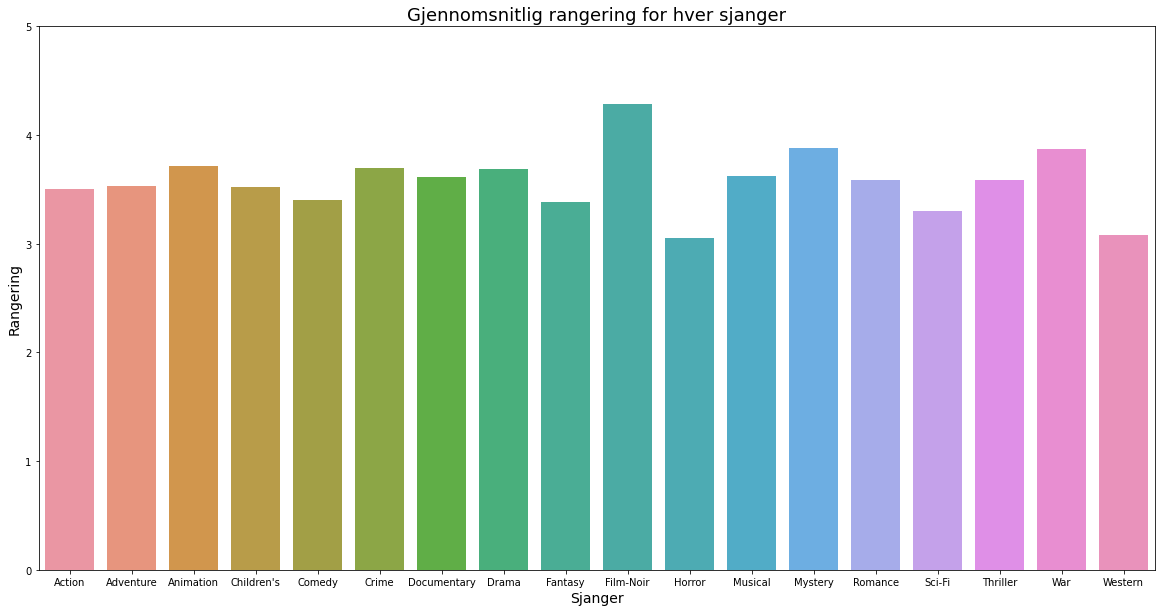

In [5]:
plt.figure(figsize = (20,10))
sns.barplot(merged_df.columns[5:23].to_list(), mean_rating)
plt.title("Gjennomsnitlig rangering for hver sjanger", fontsize=18)
plt.xlabel("Sjanger", fontsize=14)
plt.ylabel("Rangering", fontsize=14)
plt.ylim(0,5)
plt.show()

Stolpediagrammet over viser gjennomsnitlig rangering for hver sjanger. Film-Noir er best likt, mens filmer innenfor horror og western får lavest gjennomsnitlig score. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

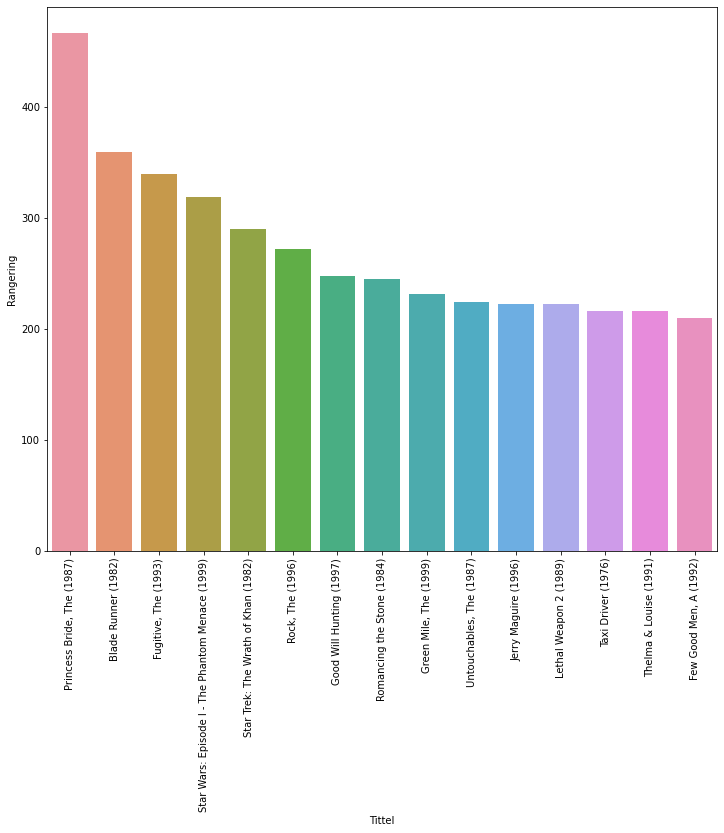

In [6]:
movie_rating = merged_df.groupby(["Tittel"])[["Rangering"]].sum()
high_rated = movie_rating.nlargest(15, "Rangering")

plt.figure(figsize = (12,10))

sns.barplot(high_rated.index, high_rated["Rangering"])
plt.xticks(rotation=90)

Dette stolpediagrammet viser de 15 best likte filmene basert på summering av alle rangeringer. Ettersom filmer som er rangert flere ganger naturlig nok får en høyere sum er ikke dette plottet så bra. 

Text(0.5, 0, 'Rangering')

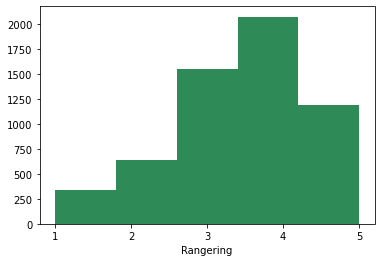

In [7]:
plt.hist(merged_df["Rangering"], bins=5, color = "seagreen")
plt.xticks(np.arange(1, 6, 1))
plt.xlabel("Rangering")

Histogrammet viser fordelingen av rangeringer. Flest har gitt rangering 4, og deretter 3. Få filmer har fått rangering 1. 

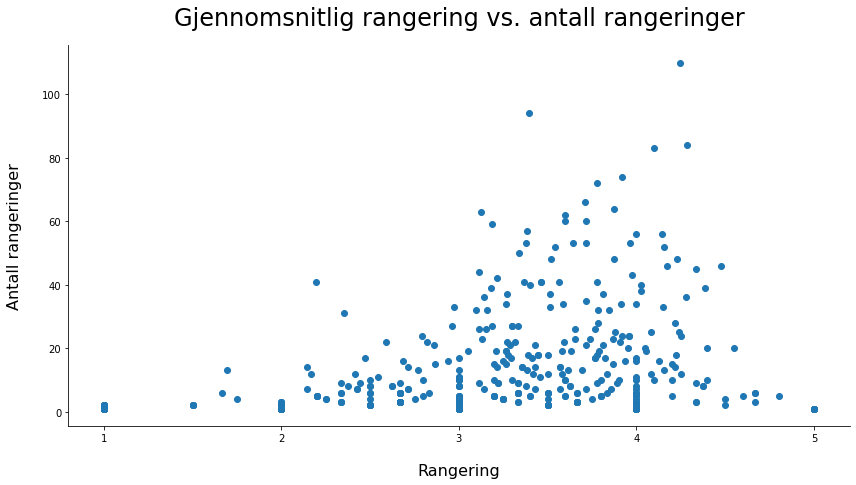

In [8]:
ratings_df = pd.DataFrame()
ratings_df['Mean_Rating'] = merged_df.groupby('Tittel')['Rangering'].mean().values
ratings_df['Num_Ratings'] = merged_df.groupby('Tittel')['Rangering'].count().values

fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Gjennomsnitlig rangering vs. antall rangeringer', fontsize=24, pad=20)
ax.set_xlabel('Rangering', fontsize=16, labelpad=20)
ax.set_ylabel('Antall rangeringer', fontsize=16, labelpad=20)
plt.xticks(np.arange(1, 6, 1))

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=1)

Plottet viser gjennomsnitlig rangering for hver film mot antall rangeringer som er gjort for den filmen. De best likte filmene har høy rangering og høyt antall rangeringer. Filmer som kun er rangert noen få ganger viser ikke et tydelig bilde på om det er en godt likt film.

In [9]:
#del data i mål-, og prediktorvariabler
reduced_df = pd.merge(film_data, rangering_data, on = "FilmID").drop(["FilmID", "Tidstempel", "BrukerID", "Tittel"], axis=1).dropna()

X = pd.get_dummies(reduced_df.iloc[:, :17]).values
y = reduced_df["Rangering"].values

# dele data i trenings, validerings og testdata
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

Her har vi delt data fra rangering og alle sjangere inn i treningsdata (70%), valideringsdata (15%) og testdata (15%). Treningsdata brukes til å tilpasse en modell, valideringsdata trenes, og brukes til å velge ut en modell, mens testdata brukes for å gi en objektiv vurdering av en endelig modell. 

In [10]:
#Lage baseline
dummy_regressor = DummyRegressor(strategy = "mean")
dummy_regressor.fit(X_train,y_train)
print('mse mellom y_val og predicted y_val:',mean_squared_error(y_val, dummy_regressor.predict(X_val)))

mse mellom y_val og predicted y_val: 1.169034871176322


Her har vi laget en baseline som bruker gjennomsnitt fra treningsdata som utgangspunkt. 

In [11]:
#Trene valideringsdata
model = {'lr': LogisticRegression(penalty='none'),
        'svm': SVC(probability=True),
        'kNN-100': KNeighborsClassifier(n_neighbors=100)}

for _, m in model.items():
    m.fit(X_train, y_train)
    
accuracies = {key: accuracy_score(y_val, m.predict(X_val)) for key, m in model.items()}
accuracies_df = pd.DataFrame(accuracies, index=['accuracy']).transpose().sort_values(
    by='accuracy', ascending=False)

print(accuracies_df)

         accuracy
svm      0.401611
kNN-100  0.395857
lr       0.382048


Her har vi trent valideringsdataen gjennom 3 modeller; Logistic Regression (lr),  C-Support Vector Classification (svm), og k=100 nærmeste nabo (kNN-100). svm har høyest nøyaktighet, og vi velger å bruke denne videre i undersøkelsene.

In [12]:
# sjekk MSE på testdata
svm_mse = {key: mean_squared_error(y_val, model.predict(X_val)) for key, model in model.items()}
svm_mse_df = pd.DataFrame(svm_mse, index=['mse']).transpose().sort_values(by='mse', ascending=True)
print(svm_mse_df.head())
print("Mean squared error for modell svm:",svm_mse_df.iloc[0,0])
print("Kvadratroten av mean squared error for modell svm:",np.sqrt(svm_mse_df.iloc[0,0]))

              mse
svm      1.227848
kNN-100  1.235903
lr       1.334868
Mean squared error for modell svm: 1.2278481012658229
Kvadratroten av mean squared error for modell svm: 1.1080830750741675


Her har vi regna ut mean squared error for svm modellen. 

In [13]:
# sjekker generaliseringsevne
best_model = model[svm_mse_df.index[0]]
test_mse = mean_squared_error(y_test, best_model.predict(X_test))
print('Generaliserings-mse:', test_mse)
print('Generaliserings-rmse:', np.sqrt(test_mse))

print('Nøyaktighet:', accuracy_score(y_test, best_model.predict(X_test)))

Generaliserings-mse: 1.3302646720368239
Generaliserings-rmse: 1.1533710036396891
Nøyaktighet: 0.37284234752589185


svm modellen generaliserer med 36,7% nøyaktighet, og har en generaliserings-RMSE på 1,17 i forhold til rangering (som går fra 1-5).

In [14]:
#Content-based filtering
user_movie_rating = merged_df.pivot_table(index='BrukerID', columns='Tittel', values='Rangering')
user_movie_rating.head()

rangering = pd.DataFrame(merged_df.groupby("Tittel")["Rangering"].mean())
rangering['rating_counts'] = pd.DataFrame(merged_df.groupby('Tittel')['Rangering'].count())

merged_df.groupby('Tittel')['Rangering'].count().sort_values(ascending=False).head()

princess_bride_ratings = user_movie_rating['Princess Bride, The (1987)']
princess_bride_ratings.head()

movies_like_princess_bride = user_movie_rating.corrwith(princess_bride_ratings)

corr_princess_bride = pd.DataFrame(movies_like_princess_bride, columns=['Correlation'])
corr_princess_bride.dropna(inplace=True)
corr_princess_bride.head()

corr_princess_bride.sort_values('Correlation', ascending=False).head(10)

corr_princess_bride= corr_princess_bride.join(rangering['rating_counts'])
corr_princess_bride.head()

corr_princess_bride[corr_princess_bride ['rating_counts']>20].sort_values('Correlation', ascending=False).head(10)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,rating_counts
Tittel,,
"Princess Bride, The (1987)",1.000000,110
Dead Again (1991),0.775290,32
Godzilla (Gojira) (1954),0.667308,21
Mr. Holland's Opus (1995),0.654077,23
Philadelphia (1993),0.639137,22
"Prince of Tides, The (1991)",0.631442,22
Rush Hour (1998),0.583454,32
In & Out (1997),0.569741,27
Bambi (1942),0.544805,34


Over har vi prøvd å lage content-based filtering ved å bruke den filmen som har fått høyest gjennomsnitlig rangering. Tanken bak dette var å finne filmer som korrelerer bra med denne filmen, og da kan anbefales til de som likte The Princess Bride. Ideelt burde vi brukt sjangere sånn at hvis man liker action, så blir man anbefalt en ny action film. Men dette fikk jeg ikke til. Fikk heller ikke til å lage collaborative filtering.  

In [15]:
movie = merged_df.pivot_table(index="BrukerID", columns = "Tittel", values = "Rangering")
movie.head()

Tittel,'Til There Was You (1997),200 Cigarettes (1999),2010 (1984),"301, 302 (1995)",Action Jackson (1988),"Adventures of Buckaroo Bonzai Across the 8th Dimension, The (1984)","Adventures of Milo and Otis, The (1986)","Adventures of Priscilla, Queen of the Desert, The (1994)",Air America (1990),"Air Up There, The (1994)",...,Why Do Fools Fall In Love? (1998),Wild Wild West (1999),Winnie the Pooh and the Blustery Day (1968),With Honors (1994),Working Girl (1988),"World Is Not Enough, The (1999)","Wrong Trousers, The (1993)","Year My Voice Broke, The (1987)",You Can't Take It With You (1938),Young Sherlock Holmes (1985)
BrukerID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0
